In [3]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%autoreload 2
import hippo3 as hippo
import os
import molparse as mp
import mcol
from pathlib import Path
import pandas as pd
from mlog import setup_logger
logger = setup_logger('2a_hits')

In [5]:
os.system('rm -v test_2a_hits.db')

removed 'test_2a_hits.db'


0

In [6]:
animal = hippo.HIPPO('2A_hippo3', 'test_2a_hits.db')
print(animal)

Creating HIPPO animal
name = 2A_hippo3
db_path = test_2a_hits.db
DEBUG: hippo3.Database.__init__()
DEBUG: Database.path = test_2a_hits.db
DEBUG: hippo3.Database.connect()
DEBUG: sqlite3.version='2.6.0'
 SUCCESS  Database connected @ test_2a_hits.db!
Creating blank database...
DEBUG: HIPPO.Database.create_table_compound()
DEBUG: HIPPO.Database.create_table_inspiration()
DEBUG: HIPPO.Database.create_table_reaction()
DEBUG: HIPPO.Database.create_table_reactant()
DEBUG: HIPPO.Database.create_table_pose()
DEBUG: HIPPO.Database.create_table_tag()
DEBUG: HIPPO.Database.create_table_quote()
DEBUG: HIPPO.Database.create_table_pattern_bfp()
 SUCCESS  Initialised animal HIPPO("2A_hippo3")!
HIPPO("2A_hippo3")


In [7]:
hits_root = Path('../aligned_v2')

In [10]:
for i,row in df.iterrows():
    print(row['crystal_name'])

    smiles = row['new_smiles'] or row['smiles']

    if '.' in smiles:
        smiles = sorted(smiles.split('.'), key = lambda x: len(x), reverse=True)[0]

    name = row['RealCrystalName'].split('-')[-1]

    pose_name = row['crystal_name']

    logger.debug(f"Trying to add compound {name=}")

    compound_id = animal.db.insert_compound(name=name, smiles=smiles, tags=['hits'])
    
    if not compound_id:

        logger.debug("compound exists")

        compound = animal.compounds[name]
    
        # compound = animal.db.query_exact(smiles)[0]
        
    else:

        compound = animal.compounds[compound_id]

    pose_name = pose_name.split('_')[-1]

    path = list(hits_root.glob(f'*{compound.name}_{pose_name}/*.pdb'))[0]

    logger.debug(f"Trying to add pose {pose_name}")

    tags=['hits']

    if isinstance(row['site_name'], str):
        print(row['site_name'])
        tags += [t.strip() for t in row['site_name'].split(';')]
    
    animal.db.insert_pose(compound=compound, name=pose_name, target='A71EV2A', path=path, tags=tags)
    
    # if i > 2:
    #     break

A71EV2A-x0152_0A
DEBUG: Trying to add compound name='x0152'
DEBUG: Trying to add pose 0A
A71EV2A-x0152_1A
DEBUG: Trying to add compound name='x0152'
 Warning  Skipping compound with existing morgan binary fingerprint "O=C(COc1ccccc1)N2CCNC(=O)C2"
DEBUG: compound exists
DEBUG: Trying to add pose 1A
A71EV2A-x0188_0A
DEBUG: Trying to add compound name='x0188'
DEBUG: Trying to add pose 0A
A71EV2A-x0202_0A
DEBUG: Trying to add compound name='x0202'
DEBUG: Trying to add pose 0A
A71EV2A-x0211_0A
DEBUG: Trying to add compound name='x0211'
DEBUG: Trying to add pose 0A
A71EV2A-x0211_1A
DEBUG: Trying to add compound name='x0211'
 Warning  Skipping compound with existing morgan binary fingerprint "NS(=O)(=O)c1ccccc1OC(F)F"
DEBUG: compound exists
DEBUG: Trying to add pose 1A
A71EV2A-x0211_2A
DEBUG: Trying to add compound name='x0211'
 Warning  Skipping compound with existing morgan binary fingerprint "NS(=O)(=O)c1ccccc1OC(F)F"
DEBUG: compound exists
DEBUG: Trying to add pose 2A
A71EV2A-x0228_0A
DEB

In [11]:
animal.compounds

set(C x 38)

In [12]:
animal.poses

set(P x 49)

In [13]:
for c in animal.compounds:
    print(c, [str(p) for p in c.poses])

C1 ['P1', 'P2']
C2 ['P3']
C3 ['P4']
C4 ['P5', 'P6', 'P7']
C5 ['P8']
C6 ['P9', 'P10']
C7 ['P11']
C8 ['P12', 'P13']
C9 ['P14', 'P15']
C10 ['P16']
C11 ['P17']
C12 ['P18']
C13 ['P19']
C14 ['P20']
C15 ['P21', 'P22']
C16 ['P23']
C17 ['P24']
C18 ['P25']
C19 ['P26', 'P27']
C20 ['P28']
C21 ['P29']
C22 ['P30']
C23 ['P31']
C24 ['P32']
C25 ['P33']
C26 ['P34']
C27 ['P35']
C28 ['P36']
C29 ['P37']
C30 ['P38']
C31 ['P39']
C32 ['P40']
C33 ['P41', 'P42', 'P43']
C34 ['P44']
C35 ['P45']
C36 ['P46']
C37 ['P47', 'P48']
C38 ['P49']


In [14]:
animal.compounds[1]

C1 "x0152"

In [15]:
animal.poses[1]

C1->P1 "A71EV2A_x0152_0A"

In [16]:
animal.db.query_substructure('c1nn(C)cc1')

[C34 "x0556",
 C12 "x0310",
 C27 "x0486",
 C28 "x0517"]

In [17]:
animal.db.query_similarity('c1nn(C)cc1', 0.2, return_similarity=True)

[(C20 "x0396", 0.41025641025641024),
 (C12 "x0310", 0.3360323886639676),
 (C34 "x0556", 0.33067729083665337),
 (C28 "x0517", 0.33067729083665337),
 (C27 "x0486", 0.3204633204633205),
 (C30 "x0526", 0.3140096618357488),
 (C17 "x0359", 0.29878048780487804),
 (C29 "x0525", 0.2826086956521739),
 (C35 "x0566", 0.2674897119341564),
 (C33 "x0554", 0.2674897119341564),
 (C37 "x0608", 0.2543103448275862),
 (C22 "x0416", 0.25301204819277107),
 (C7 "x0239", 0.23985239852398524),
 (C15 "x0341", 0.23809523809523808),
 (C18 "x0379", 0.23786407766990292),
 (C24 "x0451", 0.23426573426573427),
 (C25 "x0469", 0.23043478260869565),
 (C13 "x0326", 0.22784810126582278),
 (C38 "x0691", 0.22767857142857142),
 (C8 "x0269", 0.22624434389140272),
 (C21 "x0412", 0.22525597269624573),
 (C6 "x0229", 0.2242152466367713),
 (C11 "x0309", 0.22377622377622378),
 (C32 "x0541", 0.22340425531914893),
 (C19 "x0395", 0.21888412017167383),
 (C23 "x0428", 0.21370967741935484),
 (C31 "x0540", 0.21212121212121213),
 (C26 "x0473

 DISK  Reading /data/xchem-fragalysis/maxwin/2A_HIPPO/aligned/A71EV2A-x0341_0A/A71EV2A-x0341_0A_bound.pdb
 Warning  Multiple ligands in PDB


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

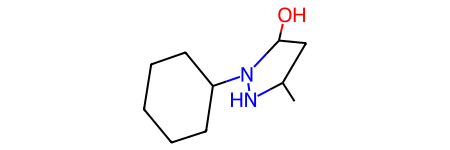

In [18]:
animal.poses[21].mol